In [1]:
from kbsa.kbsa_plotter import plot_hsic, plot_hsic_2x2
import pickle
import numpy as np

In [2]:
from pathlib import Path

folder_path = Path('kbsa/data')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

['1D_diffu_FEM_1024_[[0_7,0_9]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_1024_[[0_1,0_4]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_[[0_1,0_4]]__sobolev__unbiased__250__10.pkl',
 '1D_diffu_FEM_1024_[[0_6,0_9]]__sobolev__unbiased__2000__20.pkl',
 '1D_diffu_FEM_2048_[[0_0,1_0]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_2048_[[0_2,0_8]]__sobolev__unbiased__1000__20.pkl',
 '.DS_Store',
 '1D_diffu_FEM_[[0,1]]__sobolev__unbiased__100__10.pkl',
 '1D_diffu_FEM_2048_[[0_1,0_3]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_2048_[[0_1,0_4]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_2048_[[0_7,0_9]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_1024_[[0_4,0_6]]__sobolev__unbiased__2000__20.pkl',
 '1D_diffu_FEM_1024_[[0_0,1_0]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_1024_[[0_2,0_8]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_1024_[[0_1,0_3]]__sobolev__unbiased__1000__20.pkl',
 '1D_diffu_FEM_1024_[[0_2,0_8]]__sobolev__unbiased__2000__20.pkl

In [2]:
import pickle
from pathlib import Path
from collections import defaultdict
import numpy as np

def load_data_files(folder_path='kbsa/data'):
    folder_path = Path(folder_path)
    files = [f for f in folder_path.iterdir() if f.is_file()]
    all_data = []
    for file in files:
        if '1000' not in str(file) and '2000' not in str(file):
            continue
        with open(file, 'rb') as f:
            data = pickle.load(f)
            all_data.append((file.name, data))
    return all_data

def group_and_plot(all_data, model_name, save_plot=False, save_dir='kbsa/figs'):
    grouped = defaultdict(list)
    for fname, data in all_data:
        x_dom_array = data[model_name][0]['meta_data']['x_domains_dict'][model_name]
        x_dom = tuple(np.round(x_dom_array.flatten(), 8))  # hashable
        grouped[x_dom].append((fname, data[model_name][0]))

    for x_dom_key, data_list in grouped.items():
        # Collect all ns and meshIntervals
        ns = sorted(set(d[1]['meta_data']['n'] for d in data_list))
        mis = sorted(set(d[1]['meta_data']['model_params_dict']['1D_diffu_FEM']['meshInterval'] for d in data_list))

        if len(ns) > 2 or len(mis) > 2:
            print(f"Too many 'n' or 'meshInterval' values in group {x_dom_key}. Skipping.")
            continue

        # Fill ns and mis to size 2 if needed
        while len(ns) < 2:
            ns.append(None)
        while len(mis) < 2:
            mis.append(None)

        data_grid = [[None for _ in range(2)] for _ in range(2)]

        for fname, data in data_list:
            n_val = data['meta_data']['n']
            mi_val = data['meta_data']['model_params_dict']['1D_diffu_FEM']['meshInterval']
            i = ns.index(n_val)
            j = mis.index(mi_val)
            data_grid[i][j] = data

        save_name = ''
        if save_plot:
            save_name = f"KBSA_1D-Diffusion_grid_xdomain_{'_'.join(map(str, x_dom_key)).replace('.', '_')}.pdf"

        plot_hsic_2x2(
            data_grid=data_grid,
            model_name=model_name,
            save_plot=save_plot,
            save_directory=save_dir,
            save_name=save_name,
            row_labels=ns,
            col_labels=mis,
            x_domain=x_dom_key
        )

In [3]:
all_data = load_data_files('kbsa/data/1D_diffu_FEM')

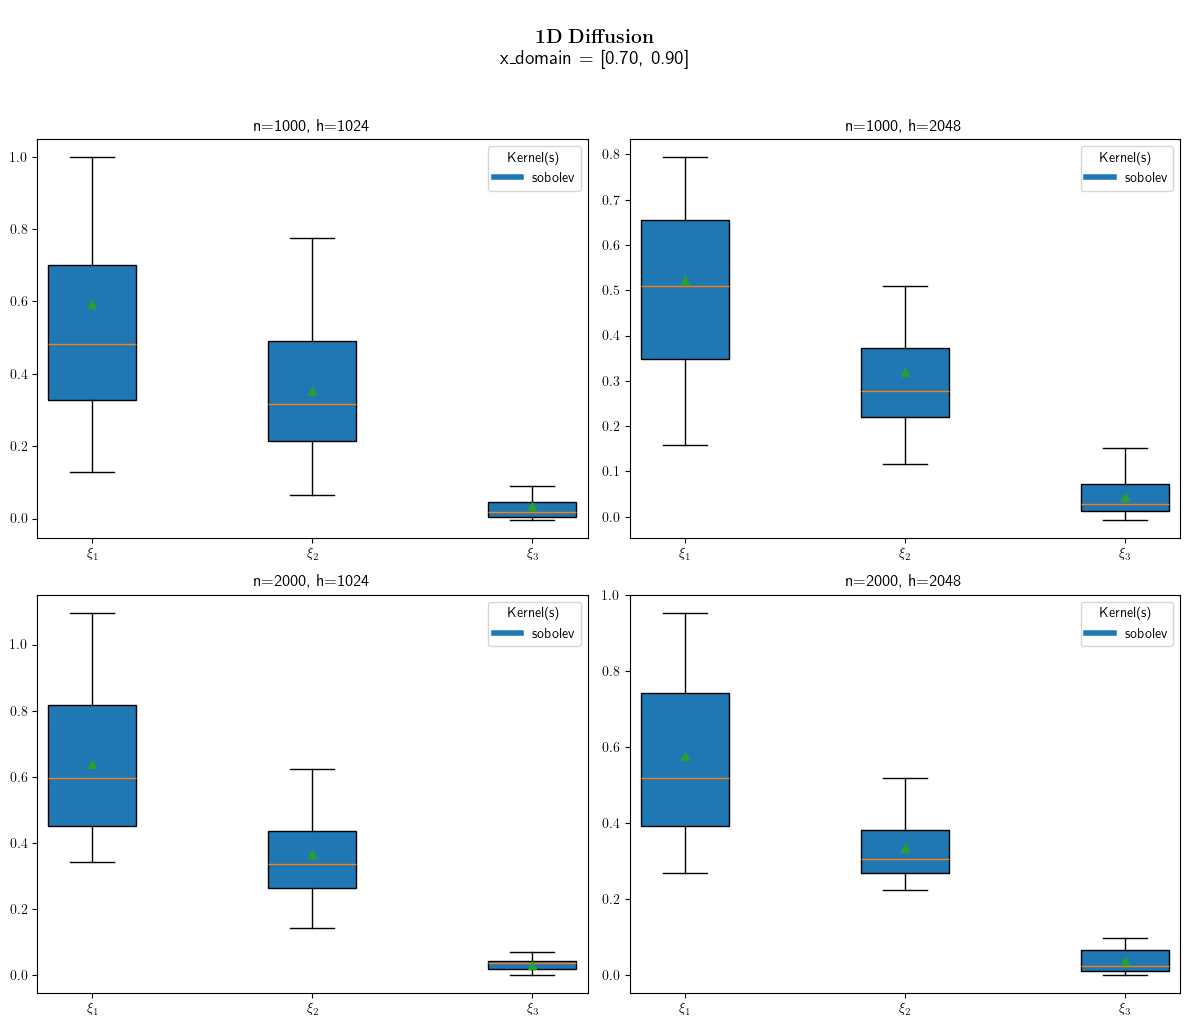

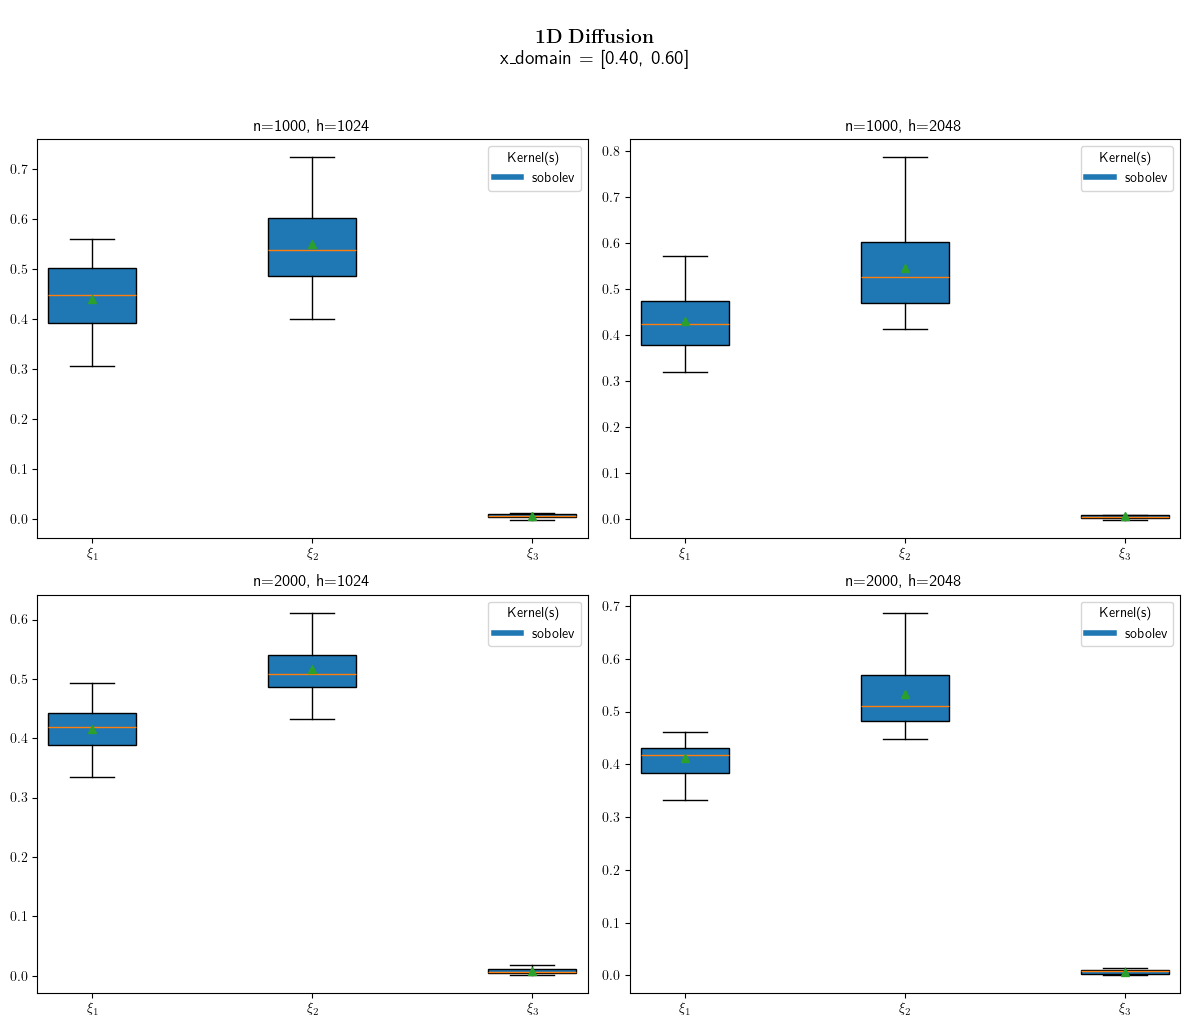

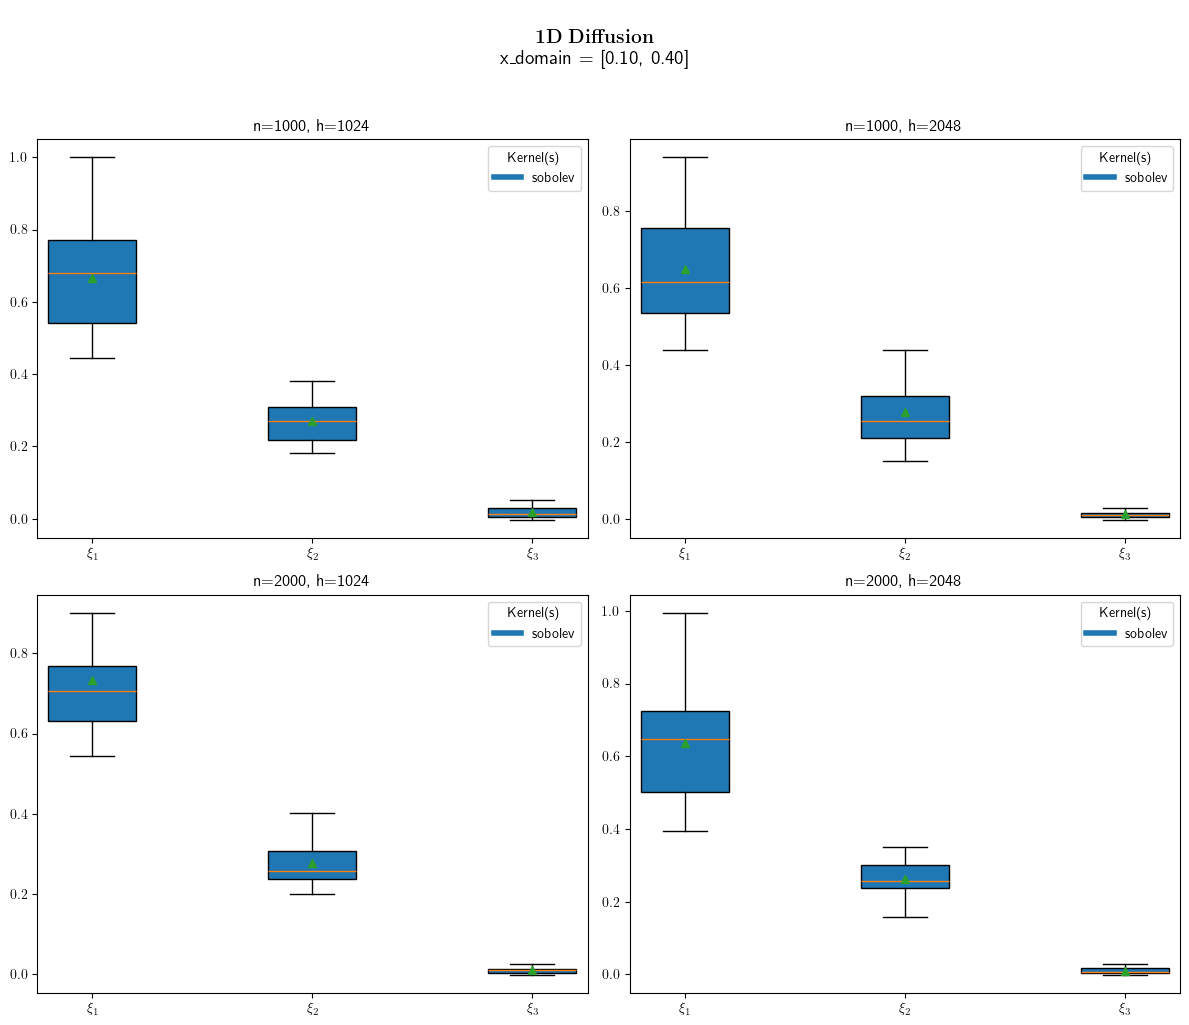

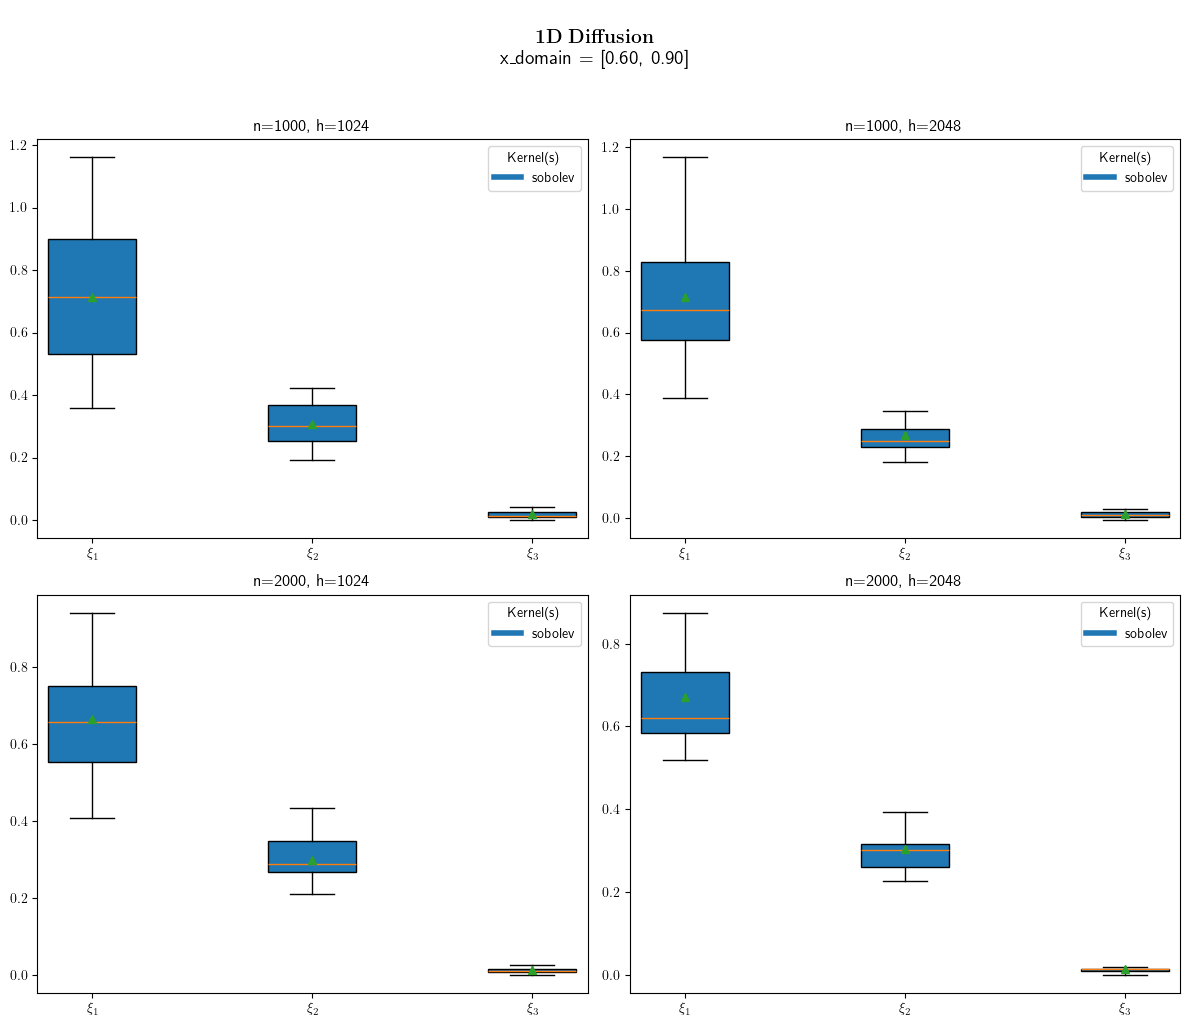

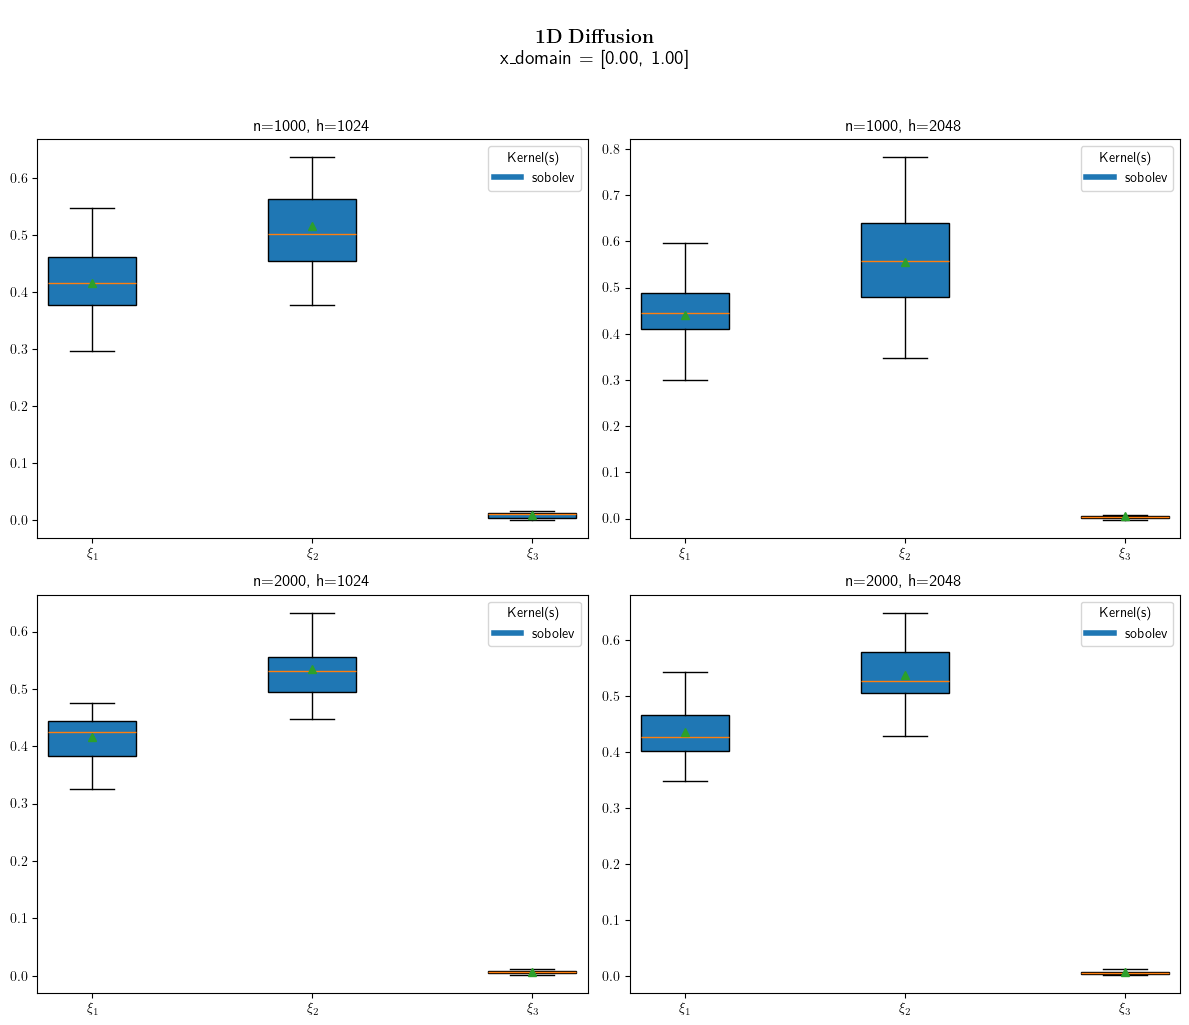

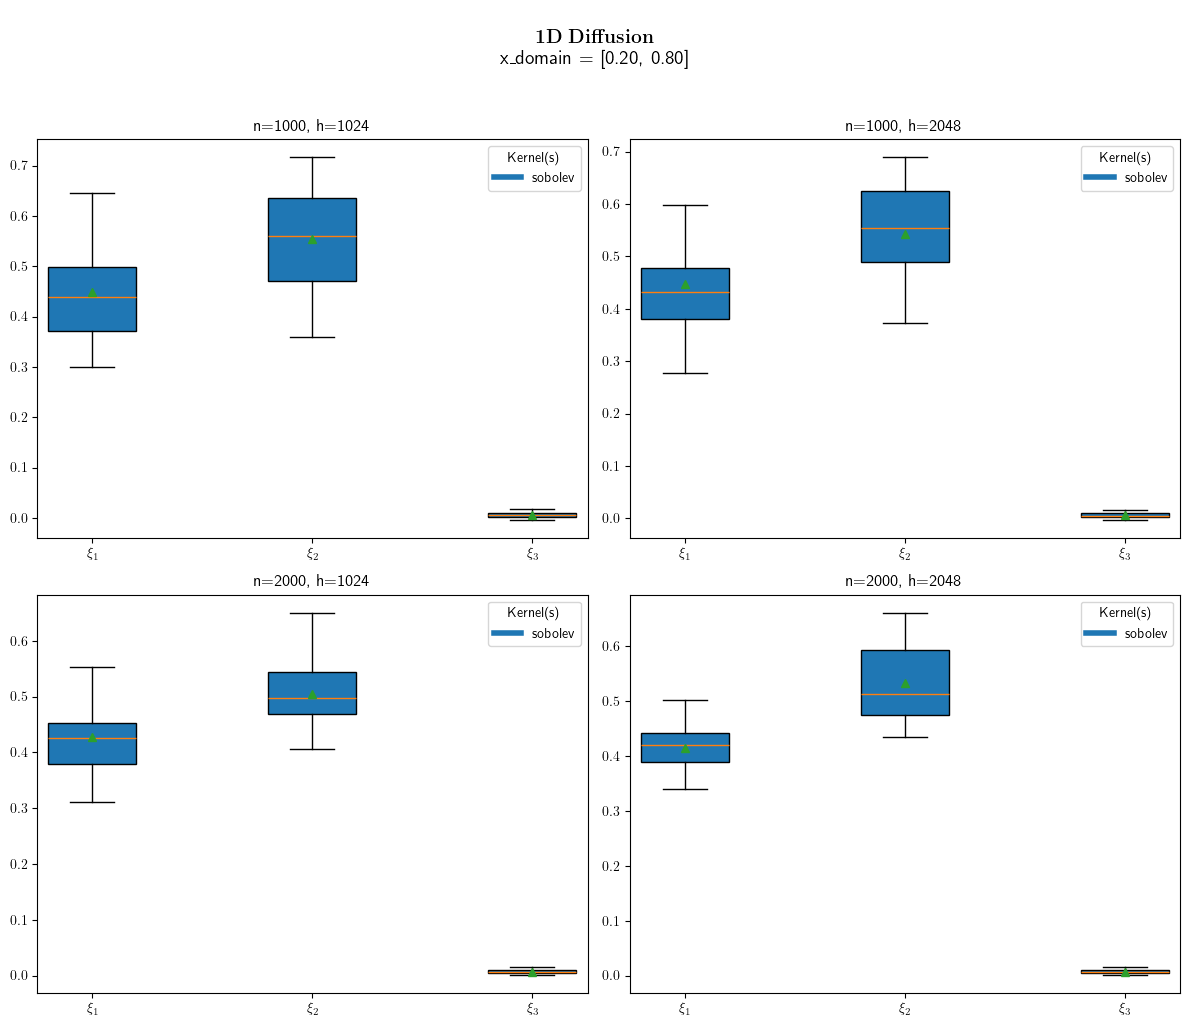

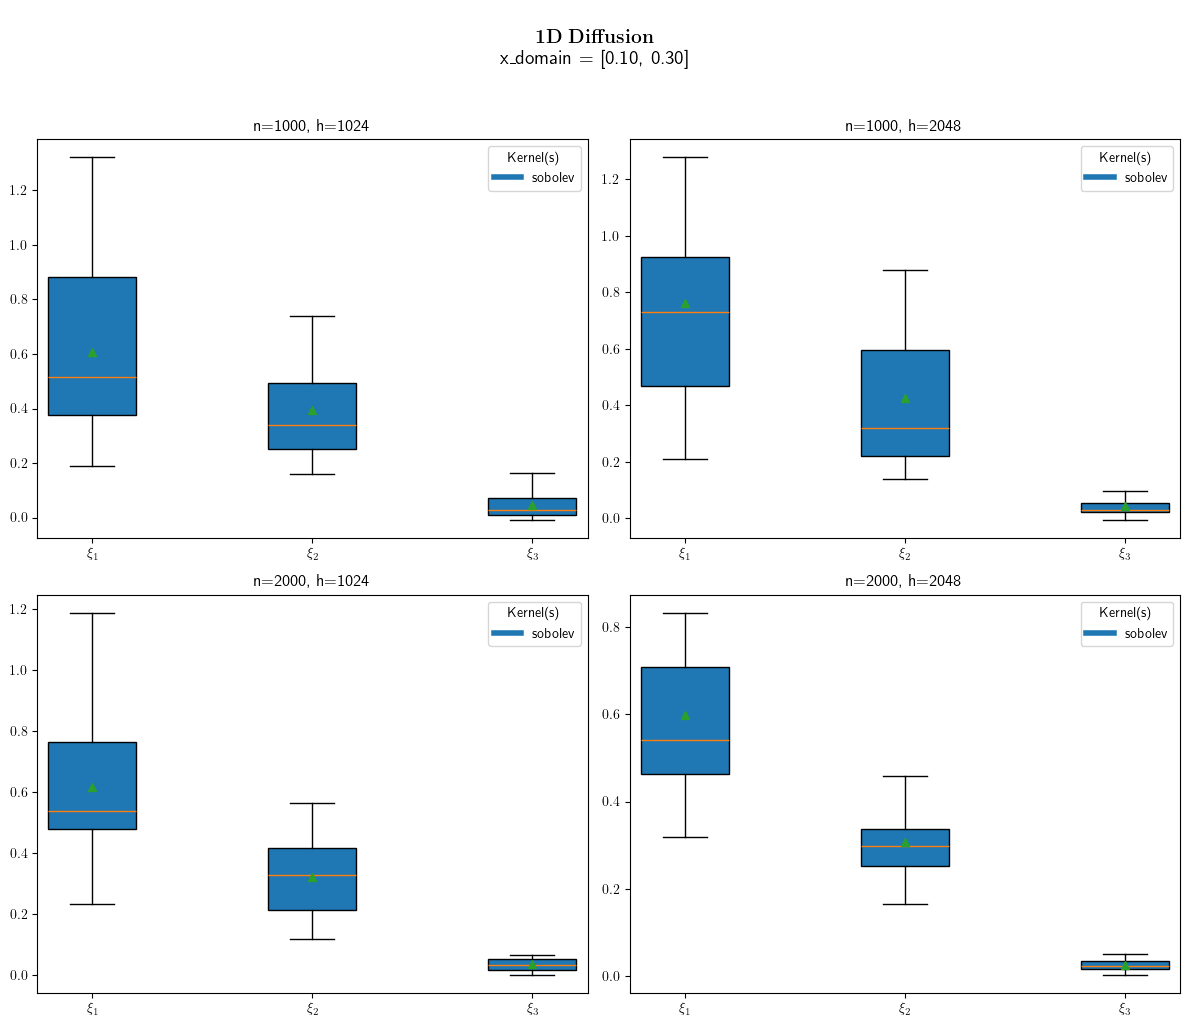

In [4]:
group_and_plot(all_data, model_name='1D_diffu_FEM', save_plot=False)

1D_diffu_FEM_2048_[[0_0,1_0]]__sobolev__unbiased__1000__20.pkl


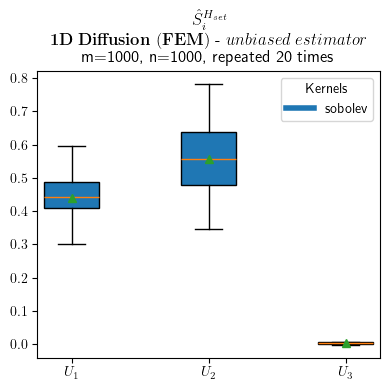

1D_diffu_FEM_2048_[[0_2,0_8]]__sobolev__unbiased__1000__20.pkl


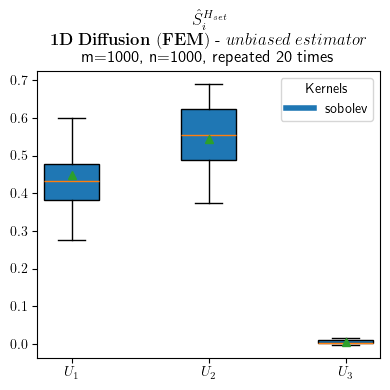

1D_diffu_FEM_2048_[[0_1,0_3]]__sobolev__unbiased__1000__20.pkl


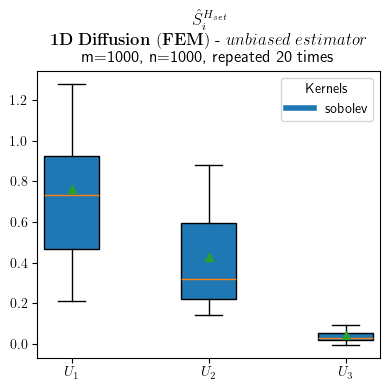

1D_diffu_FEM_2048_[[0_1,0_4]]__sobolev__unbiased__1000__20.pkl


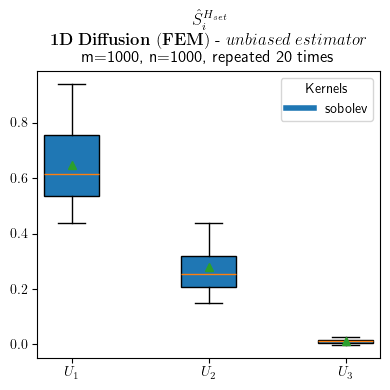

1D_diffu_FEM_2048_[[0_6,0_9]]__sobolev__unbiased__1000__20.pkl


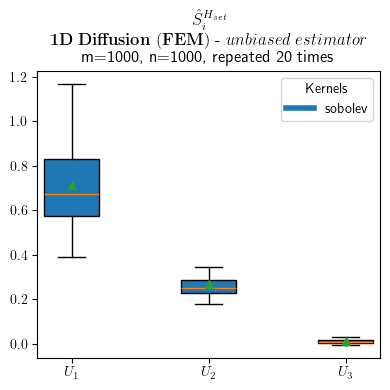

1D_diffu_FEM_2048_[[0_4,0_6]]__sobolev__unbiased__1000__20.pkl


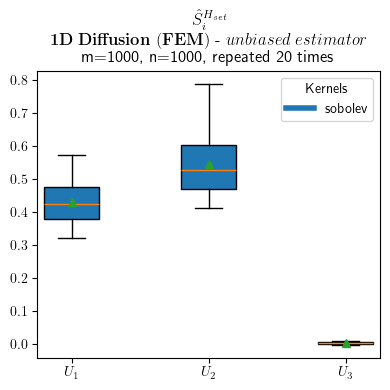

In [ ]:
for file in files:
    if '.pkl' not in file:
        continue
    if 'expl' in file:
        continue
    if '2048' not in file:
        continue
    # if '2000' not in file:
    #     continue
    with open(f'kbsa/data/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            print(file)
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=False,
                    save_directory='kbsa/figs',
                    save_name='')